## Présentation générale de l'ensemble de données

___
Plongeons dans le fascinant paysage des données criminelles des États-Unis avec ce dataset riche et complexe. 

Avec pas moins de 127 attributs sélectionnés, chaque ligne de ce tableau offre une fenêtre sur la dynamique sociale et policière des communautés américaines. Ces variables, judicieusement choisies pour leur potentiel prédictif dans le domaine de la criminalité, englobent un vaste éventail de facteurs, allant de la densité urbaine au revenu familial médian, en passant par la situation sociale des habitants. 

Le cœur de cette compilation réside dans la variable "**Crimes violents par habitant**", calculée minutieusement à partir de la population et de la somme des crimes considérés comme violents aux États-Unis. 

Cependant, ce tableau n'est pas simplement une collection de chiffres bruts. Chaque donnée numérique a été normalisée dans une plage décimale allant de 0 à 1, préservant ainsi les nuances des ratios internes tout en permettant des comparaisons significatives. 

Toutefois, derrière cette richesse de données, des défis ont été relevés, des controverses concernant le comptage des viols aux absences de certaines communautés dans les ensembles de données. 

Malgré ces limites, plongeons dans ce tableau, explorons les profondeurs de la criminalité américaine et découvrons les histoires que ces données peuvent raconter ✨
___

# Notre problèmatique

**Prédiction du taux de criminalité violente** 

En utilisant les caractéristiques **socio-économiques et démographiques** des crimes commis aux Etats-Unis, nous allons essayer de prédire le taux de criminalité violente dans différents états.

In [275]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/communities-and-crime/communities+and+crime/communities.names
/kaggle/input/communities-and-crime/communities+and+crime/communities.data


# I - Analyse des données du dataset

Dans le but de comprendre nos données , on a effectué certains tests liés aux élements qu'on a vu en classe 

In [276]:
import pandas as pd
import numpy as np

In [278]:
# Charger le fichier communities.data dans un DataFrame
communities_and_crime = pd.read_csv('/kaggle/input/communities-and-crime/communities+and+crime/communities.data')

# Redéfinition des noms de colonnes
communities_and_crime.columns=['state','county', 'community','communityname','fold','population', 'householdsize','racepctBlack','racepctWhite','racepctAsian',
                               'racepctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome', 'pctWWage', 'pctWFarmSelf',
                               'pctWInvInc', 'pctWSocSec', 'pctWPubAsst','pctWRetire', 'medFamInc', 'perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap',
                               'OtherPerCap','HispPerCap','NumUnderPov', 'PctPopUnderPov','PctLess9thGrade','PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 
                               'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam', 'PctFam2Par', 'PctKids2Par',
                               'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8', 
                               'PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10', 'PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 
                               'PersPerOwnOccHous','PersPerRentOccHous', 'PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
                               'PctVacMore6Mos', 'MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ',
                               'MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85',
                               'PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol',
                               'PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens',
                               'PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop']

# Afficher le nombre de lignes (crimes) commis
print("Nombre de crimes dans le dataset (lignes): \n ->", len(communities_and_crime))
print("=========================================")

# Afficher les noms des colonnes, qui sont les "features"
print("Nombre de colonnes : \n ->", len(communities_and_crime.columns))
print("=========================================")
print("Noms des features du dataset :\n\n", communities_and_crime.columns)


print("----------------------------------------------------------------------------------")
# Afficher un aperçu des données avec des valeurs manquantes 
print(communities_and_crime.head())

####################################################
# Remplacer les '?' par NaN
communities_and_crime.replace('?', "NaN", inplace=True)
####################################################

print("----------------------------------------------------------------------------------")
# Afficher un aperçu des données après remplacement des valeurs manquantes 
print(communities_and_crime.head())

Nombre de crimes dans le dataset (lignes): 
 -> 1993
Nombre de colonnes : 
 -> 128
Noms des features du dataset :

 Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctBlack', 'racepctWhite', 'racepctAsian',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop'],
      dtype='object', length=128)
----------------------------------------------------------------------------------
   state county community        communityname  fold  population  \
0     53      ?         ?          Tukwilacity     1        0.00   
1     24      ?         ?         Aberdeentown     1        0.00   
2     34      5     81440  Willingborotownship     1        0.04   
3     42     95      6096    Bethlehemtownship     1        0.01   
4      6      ?         ?    SouthPasadenacity     1        0.

> * Nous remarquons donc que chaque **ligne** de notre dataset représente **une communauté (ou une ville)** aux États-Unis.
> * Par exemple, pour le première ville, on peut voir la moyenne du nombre de personnes d'un foyer, les origines raciales de sa population (en pourcentage), leurs tranches d'âge...etc.
> * D'apès la description du dataset sur 
[https://archive.ics.uci.edu/dataset/183/communities+and+crime](http://archive.ics.uci.edu/dataset/183/communities+and+crime), les 127 premières colonnes représentent des **features**, tandis que la dernière colonne (**ViolentCrimesPerPop**) représente la **target**.

___
Dans le contexte de notre dataset, les criminalités violentes représentent : *les meurtres, les viols, les vols et les agressions.*

Nous avons ainsi la colonne target **ViolentCrimesPerPop** qui est décrite comme suit : 

> *ViolentCrimesPerPop = nombre total de crimes violents par 100K personnes*

Dans notre cas, les valeurs sont continues et elles varient entre 0 et 1. 

Etant des valeurs pas très variées et pour avoir une meilleure lisibilité des valeurs réelles, nous allons créer une nouvelle colonne nommée **Numeric_ViolentCrimesPerPop** qui va contenir des intervalles de valeurs plutôt que des valeurs discrètes, qui correspondent aux valeurs normalisées de *ViolentCrimesPerPop*.
___

In [279]:
#### Transformer les données continues en intervalles pour mieux voir leur fréquence

intervals = [(0.000, 0.067), (0.067, 0.133), (0.133, 0.200), (0.200, 0.267),
             (0.267, 0.333), (0.333, 0.400), (0.400, 0.467), (0.467, 0.533),
             (0.533, 0.600), (0.600, 0.667), (0.667, 0.733), (0.733, 0.800),
             (0.800, 0.867), (0.867, 0.933), (0.933, 1.000)]

values = [(0.000, 0.067), (0.067, 0.133), (0.133, 0.200), (0.200, 0.267),
             (0.267, 0.333), (0.333, 0.400), (0.400, 0.467), (0.467, 0.533),
             (0.533, 0.600), (0.600, 0.667), (0.667, 0.733), (0.733, 0.800),
             (0.800, 0.867), (0.867, 0.933), (0.933, 1.000)]

def map_values(x):
    for interval, value in zip(intervals, values):
        if interval[0] <= x and x <= interval[1]:
            return value
        
#####################################################################################################################
        
# Créer une nouvelle colonne avec les valeurs numériques des totaux de crimes violents
communities_and_crime['Numeric_ViolentCrimesPerPop'] = communities_and_crime['ViolentCrimesPerPop'].apply(map_values)

# Afficher les fréquences des intervalles de valeurs pour la colonne "Numeric_ViolentCrimesPerPop"
count = communities_and_crime.groupby('Numeric_ViolentCrimesPerPop').size().sort_values(ascending=False)

#affichage du résultat
print(count)

Numeric_ViolentCrimesPerPop
(0.0, 0.067)      484
(0.067, 0.133)    420
(0.133, 0.2)      283
(0.2, 0.267)      177
(0.267, 0.333)    142
(0.333, 0.4)      113
(0.467, 0.533)     76
(0.4, 0.467)       59
(0.533, 0.6)       57
(0.933, 1.0)       50
(0.6, 0.667)       38
(0.667, 0.733)     37
(0.8, 0.867)       23
(0.733, 0.8)       20
(0.867, 0.933)     14
dtype: int64


> En observant la répartition du taux de criminalité dans les données, on constate uque le taux de criminalité aux États-Unis varie considérablement d'une communauté à l'autre. 
> 
> Les intervalles les plus représentés dans le dataset se situent dans la plage **inférieure** du taux de criminalité, avec plus de la moitié des communautés ayant un taux de criminalité compris entre 0 et 0,133. 
> 
> Cependant, d'autres communautés présentent également des taux de criminalité plus élevés, comme en témoigne la présence de valeurs dans les intervalles **supérieurs**, jusqu'à 1,00. 
> 
> Cette diversité suggère l'existence de multiples facteurs **socio-économiques et démographiques** qui influencent le niveau de criminalité dans les différentes régions des États-Unis.

### **Retrouver les états avec les taux de criminalité les plus élevés**

___
**Important ⚠️**

Dans la description du dataset, on a cette information : 

> *US state (by number) - not counted as predictive, but if considered, should be consided nominal*

Les États ne peuvent pas être classés dans un ordre numérique significatif (comme on le ferait avec des nombres), mais ils représentent plutôt des catégories distinctes sans aucune hiérarchie intrinsèque. 

Ainsi, les États seront traités comme des catégories distinctes sans ordre spécifique.
___

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns

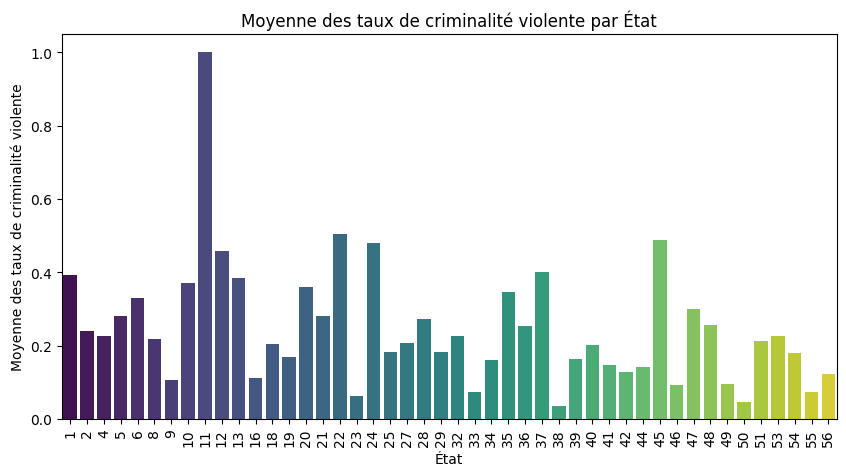

In [281]:
# Calculer la moyenne du taux de criminalité pour chaque état
state_crime_means = communities_and_crime.groupby('state')['ViolentCrimesPerPop'].mean().reset_index()

# Trier les états par taux de criminalité moyen pour une meilleure visualisation
state_crime_means = state_crime_means.sort_values(by='ViolentCrimesPerPop', ascending=False)

# Créer le graphique à barres
plt.figure(figsize=(10, 5))
sns.barplot(x='state', y='ViolentCrimesPerPop', data=state_crime_means, palette='viridis')

plt.xlabel('État')
plt.ylabel('Moyenne des taux de criminalité violente')
plt.title('Moyenne des taux de criminalité violente par État')
plt.xticks(rotation=90)  # Rotation des labels de l'axe x pour une meilleure lisibilité
plt.show()

___
Pour mieux comprendre les facteurs ainsi que les critères ayant conduit à ces taux de criminalité violente assez élevés, nous allons analyser ces données en **3** catégories : 
 
1. Caractéristiques **démographiques**
2. Caractéristiques **économiques**
3. Caractéristiques **sociales**

Pour plus de lisibilité, nous allons nous baser sur les **10** états ayant la moyenne de taux de criminialité la plus élevée.
___

In [282]:
# Sélectionner les 10 états avec la moyenne de taux de criminalité la plus élevée
top_10_states = state_crime_means.head(10)

# Afficher les résultats sans les index
print(top_10_states.to_string(index=False))

 state  ViolentCrimesPerPop
    11             1.000000
    22             0.504545
    45             0.486786
    24             0.480000
    12             0.458333
    37             0.401957
     1             0.393721
    13             0.384054
    10             0.370000
    20             0.360000


### A. Caractéristiques démographiques :
___

Après une bonne analyse des colonnes du tableau, nous avons pu identifier ces attributs qui reflètent l'aspect démographique des habitants :

- **population**: La population totale de la communauté.


- **householdsize**: La taille moyenne des ménages dans la communauté.

- **racepctBlack**: Le pourcentage de la population qui est afro-américaine.
- **racepctWhite**: Le pourcentage de la population qui est caucasienne.
- **racepctAsian**: Le pourcentage de la population qui est d'origine asiatique.
- **racepctHisp**: Le pourcentage de la population qui est d'origine hispanique.

- **agePct12t21**: Le pourcentage de la population âgée de 12 à 21 ans.
- **agePct12t29**: Le pourcentage de la population âgée de 12 à 29 ans.
- **agePct16t24**: Le pourcentage de la population âgée de 16 à 24 ans.
- **agePct65up**: Le pourcentage de la population âgée de 65 ans et plus.

- **numbUrban**: Le nombre de personnes vivant dans des zones urbaines.
- **pctUrban**: Le pourcentage de la population vivant dans des zones urbaines.
---
En vue du nombre important de ces caractéristiques, nous allons procéder au *Feature Engineering* pour essayer de créer des features plus simples et facile à utiliser.

Voici donc quelques nouvelles features que l'on pourrait créer :

> **Indice de jeunesse (youthIndex):**
> 
> Un indice combinant les pourcentages de la population âgée de 12 à 21 ans, de 12 à 29 ans et de 16 à 24 ans. 
> Cela pourrait refléter le degré de jeunesse de la population.


> **Ratio de diversité ethnique (ethnicDiversityRatio)**:
>
> Un indice de la diversité ethnique de la communauté, calculé en mesurant la variance des pourcentages de chaque groupe ethnique. 
> Plus la valeur est élevée, plus la diversité ethnique est grande.



In [283]:
# Créer la colonne youthIndex
communities_and_crime['youthIndex'] = (communities_and_crime['agePct12t21'] + communities_and_crime['agePct12t29'] + communities_and_crime['agePct16t24']) / 3

# Calculer la variance des pourcentages ethniques
ethnic_columns = ['racepctBlack', 'racepctWhite', 'racepctAsian', 'racepctHisp']
communities_and_crime['ethnicDiversityRatio'] = communities_and_crime[ethnic_columns].var(axis=1)

# Afficher les premières lignes du dataset avec les nouvelles features
print(communities_and_crime[['youthIndex', 'ethnicDiversityRatio']].head())

   youthIndex  ethnicDiversityRatio
0    0.400000              0.097767
1    0.380000              0.062433
2    0.450000              0.202767
3    0.330000              0.201825
4    0.353333              0.167358


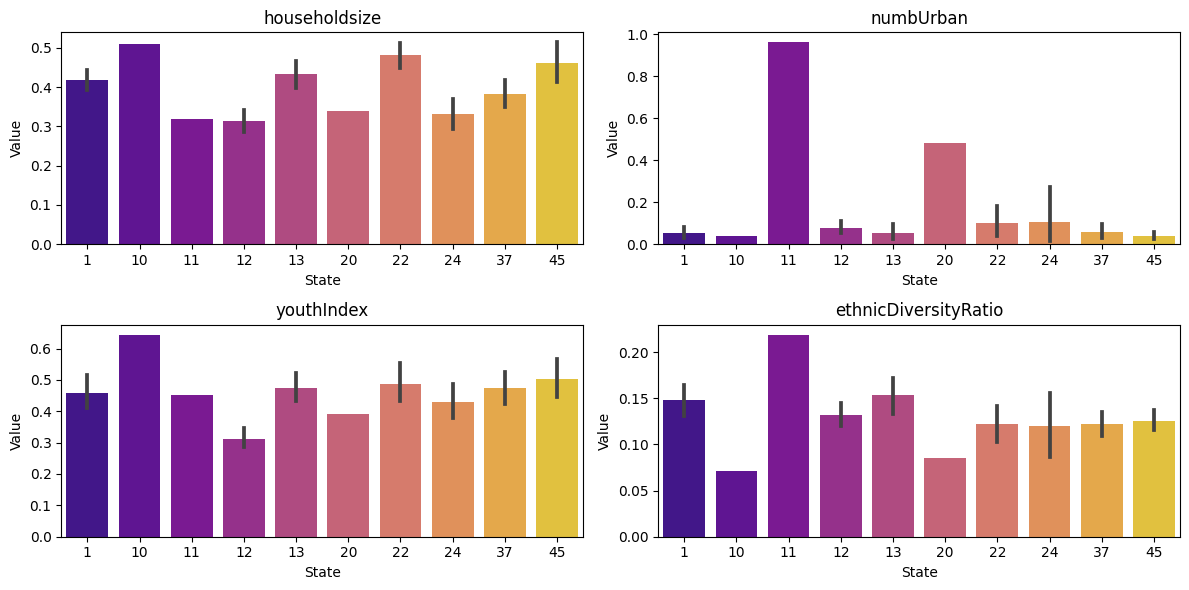

In [284]:
# Sélectionner les 10 premiers états
top_10_states = state_crime_means.head(10)['state']

# Sélectionner les colonnes à afficher
columns_to_plot = ['householdsize', 'numbUrban', 'youthIndex', 'ethnicDiversityRatio']

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

for i, col in enumerate(columns_to_plot):
    
    # Sélectionner les données pour la colonne spécifique
    data = communities_and_crime.loc[communities_and_crime['state'].isin(top_10_states), ['state', col]]
    data = data.sort_values(by='state')
    
    # Créer le graphique à barres
    ax = axs[i // 2, i % 2]
    sns.barplot(x='state', y=col, data=data, palette='plasma', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('State')
    ax.set_ylabel('Value')


# Afficher les graphiques
plt.tight_layout()
plt.show()

> D'après les résultats de ces graphiques, nous remarquons que les facteurs démographiques majeurs de la criminalité violente élevée dans ces états sont :  **la jeunesse** et **le nombre élevé de personnes dans un foyer**
>
> De même, on voit que ces états n'ont pas un grand nombre de personnes vivant dans des zones urbaines (mise à part l'état 11), ce qui peut suugérer que ces villes sont principalement rurales et de petit nombre de population totale.
>
> En plus, le ratio de diversité ethnique reste tout de même considérable mais peu comparé aux taux généraux aux Etats-Unis , avec des pourcentages assez rapprochés entre ces états, ce qui peut refléter également des problèmes d'intégration. 



### B. Caractéristiques économiques :
___

Après une bonne analyse des colonnes du tableau, nous avons pu identifier ces attributs qui reflètent l'aspect économique des habitants :


#### REVENUES

* medIncome: Le revenu médian des ménages dans la communauté.
* pctWWage: Le pourcentage de ménages ayant un revenu salarial en 1989.
* pctWFarmSelf: Le pourcentage de ménages ayant un revenu d'exploitation agricole ou d'auto-emploi en 1989.
* pctWInvInc: Le pourcentage de ménages ayant un revenu d'investissement ou de location en 1989.
* pctWSocSec: Le pourcentage de ménages ayant un revenu de sécurité sociale en 1989.
* pctWPubAsst: Le pourcentage de ménages ayant une aide publique en 1989.
* pctWRetire: Le pourcentage de ménages ayant un revenu de retraite en 1989.
* medFamInc: Le revenu médian des familles (différent du revenu des ménages pour les ménages non familiaux).
* perCapInc: Le revenu par habitant.
* whitePerCap: Le revenu par habitant pour les caucasiens.
* blackPerCap: Le revenu par habitant pour les afro-américains.
* indianPerCap: Le revenu par habitant pour les amérindiens.
* AsianPerCap: Le revenu par habitant pour les personnes d'origine asiatique.
* OtherPerCap: Le revenu par habitant pour les personnes d'autres origines.
* HispPerCap: Le revenu par habitant pour les personnes d'origine hispanique.

#### PAUVRETE

* NumUnderPov: Le nombre de personnes sous le seuil de pauvreté.
* PctPopUnderPov: Le pourcentage de personnes sous le seuil de pauvreté.

#### EMPLOI

* PctUnemployed: Le pourcentage de personnes de 16 ans et plus, dans la population active, et au chômage.
* PctEmploy: Le pourcentage de personnes de 16 ans et plus employées.
* PctEmplManu: Le pourcentage de personnes de 16 ans et plus employées dans la fabrication.
* PctEmplProfServ: Le pourcentage de personnes de 16 ans et plus employées dans les services professionnels.
* PctOccupManu: Le pourcentage de personnes de 16 ans et plus employées dans la fabrication.
* PctOccupMgmtProf: Le pourcentage de personnes de 16 ans et plus employées dans la gestion ou les professions libérales.

---
En vue du nombre important de ces caractéristiques, nous allons procéder au *Feature Engineering* pour essayer de créer des features plus simples et facile à utiliser.

Voici donc quelques nouvelles features que l'on va créer :
___
Revenus agrégés :

> **TotalIncome**: Le revenu total agrégé, combinant les revenus médians des ménages, des familles et par habitant.
>
> **PctLowIncome**: Le pourcentage de personnes vivant avec un revenu inférieur à un certain seuil basé sur les différentes mesures de revenu.

___
Pauvreté et emploi :


> **PovertyEmploymentRatio**: Le ratio entre le pourcentage de personnes sous le seuil de pauvreté et le pourcentage total d'emplois, donnant un aperçu de l'ampleur de la pauvreté relative au niveau d'emploi dans la communauté.
>
> **UnemploymentRate**: Le taux de chômage, indiquant la proportion de la population active sans emploi.


In [285]:
# Création des nouvelles features

# Revenus agrégés
communities_and_crime['TotalIncome'] = communities_and_crime['medIncome'] + communities_and_crime['medFamInc'] + communities_and_crime['perCapInc']
communities_and_crime['PctLowIncome'] = (communities_and_crime['NumUnderPov'] / communities_and_crime['population'])

# Pauvreté et emploi
communities_and_crime['PovertyEmploymentRatio'] = communities_and_crime['PctPopUnderPov'] / communities_and_crime['PctEmploy']
communities_and_crime['UnemploymentRate'] = communities_and_crime['PctUnemployed']

# Afficher les premières lignes du tableau pour vérifier les nouvelles colonnes
print(communities_and_crime[['TotalIncome', 'PctLowIncome', 'PovertyEmploymentRatio', 'UnemploymentRate']].head())

   TotalIncome  PctLowIncome  PovertyEmploymentRatio  UnemploymentRate
0         0.97           inf                0.328767              0.27
1         0.85           inf                0.465517              0.36
2         1.45          0.25                0.140845              0.33
3         1.39          0.00                0.092308              0.12
4         1.86          0.50                0.184615              0.10


In [286]:
import warnings

# Ignorer les warnings de type RuntimeWarning liés au valeurs NaN
warnings.filterwarnings("ignore", category=RuntimeWarning)

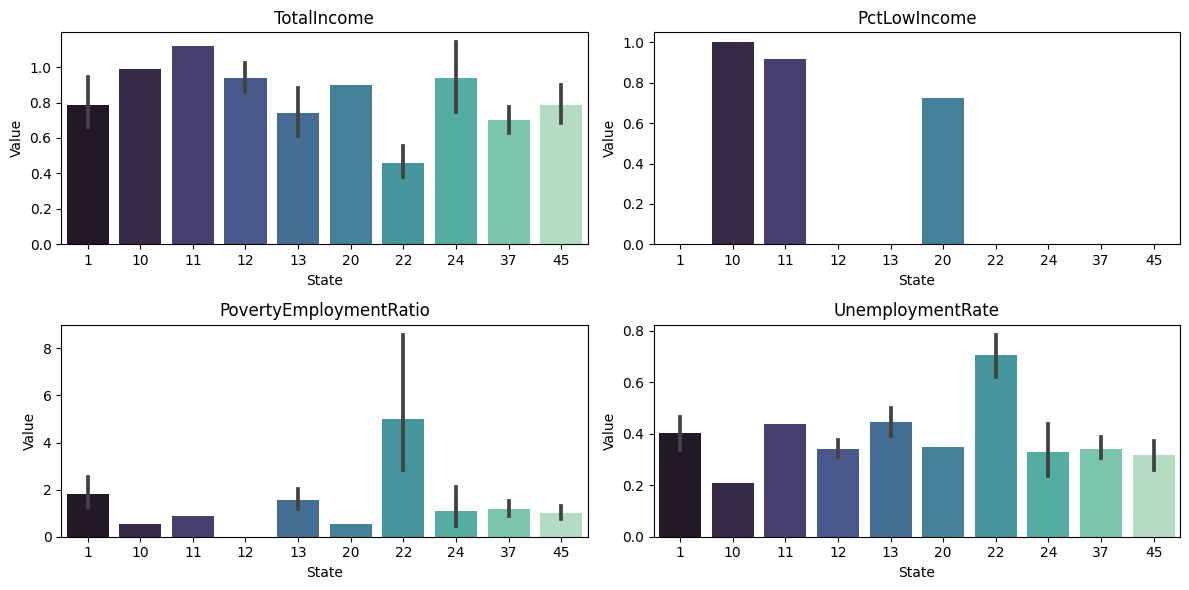

In [290]:
# Sélectionner les colonnes à afficher
columns_to_plot = ['TotalIncome', 'PctLowIncome', 'PovertyEmploymentRatio', 'UnemploymentRate']

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

for i, col in enumerate(columns_to_plot):
    
    # Sélectionner les données pour la colonne spécifique
    data = communities_and_crime.loc[communities_and_crime['state'].isin(top_10_states), ['state', col]]
    data = data.sort_values(by='state')
    
    # Créer le graphique à barres
    ax = axs[i // 2, i % 2]
    sns.barplot(x='state', y=col, data=data, palette='mako', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('State')
    ax.set_ylabel('Value')


# Afficher les graphiques
plt.tight_layout()
plt.show()

> ## 🔥🔥🔥🔥🔥 *A COMPLETER AVEC LES CONCLUSIONS DES GRAPHES* 🔥🔥🔥🔥🔥🔥

### C. Caractéristiques sociales :
___

Après une bonne analyse des colonnes du tableau, nous avons pu identifier ces attributs qui reflètent l'aspect social des habitants :

Caractéristiques sociales :

#### NIVEAU D'ETUDE

* PctLess9thGrade: Le pourcentage de personnes de 25 ans et plus ayant moins qu'une éducation de 9e année.
* PctNotHSGrad: Le pourcentage de personnes de 25 ans et plus qui ne sont pas diplômées de l'école secondaire.
* PctBSorMore: Le pourcentage de personnes de 25 ans et plus avec un diplôme de baccalauréat ou plus.

#### SITUATION SOCIALE

* MalePctDivorce: Le pourcentage d'hommes divorcés.
* MalePctNevMarr: Le pourcentage d'hommes jamais mariés.
* FemalePctDiv: Le pourcentage de femmes divorcées.
* TotalPctDiv: Le pourcentage de la population divorcée.
* PersPerFam: Le nombre moyen de personnes par famille.
* PctFam2Par: Le pourcentage de familles (avec enfants) dirigées par deux parents.
* PctKids2Par: Le pourcentage d'enfants dans des foyers familiaux avec deux parents.
* PctYoungKids2Par: Le pourcentage d'enfants de 4 ans et moins dans des foyers avec deux parents.
* PctTeen2Par: Le pourcentage d'enfants de 12 à 17 ans dans des foyers avec deux parents.
* PctWorkMomYoungKids: Le pourcentage de mères d'enfants de 6 ans et moins dans la population active.
* PctWorkMom: Le pourcentage de mères d'enfants de moins de 18 ans dans la population active.

---
En vue du nombre important de ces caractéristiques, nous allons procéder au *Feature Engineering* pour essayer de créer des features plus simples et facile à utiliser.

Voici donc quelques nouvelles features que l'on va créer :
___

Education et emploi :

> **EducatedEmployed**: Le pourcentage de personnes ayant au moins un diplôme d'études secondaires et étant employées.
>
> **ManuEmploymentRatio**: Le ratio entre le pourcentage d'emplois dans le secteur "*manufacturier*" et le pourcentage total d'emplois, indiquant l'importance relative de ce secteur dans l'emploi local.
>
> **ProfServEmployment**: Le pourcentage d'emplois dans les "*services professionnels*" par rapport à l'ensemble des emplois, reflétant la part de l'emploi dans ce secteur.

___
Situation sociale et familiale :


> **DivorceRate**: Le taux de divorce, calculé en combinant les pourcentages de personnes divorcées et jamais mariées.
>
> **FamilyStructure**: Une variable catégorielle indiquant la structure familiale dominante dans la communauté (monoparentale, biparentale).
>
> **WorkingMothers**: Le pourcentage de mères de jeunes enfants (moins de 6 ans) travaillant par rapport à l'ensemble des mères actives, mettant en évidence la participation des mères au marché du travail malgré les responsabilités familiales.


In [291]:
# Création des nouvelles features

# Education et emploi
communities_and_crime['EducatedEmployed'] = (100 - communities_and_crime['PctNotHSGrad']) * (communities_and_crime['PctEmploy'] / 100)
communities_and_crime['ManuEmploymentRatio'] = communities_and_crime['PctEmplManu'] / communities_and_crime['PctEmploy']
communities_and_crime['ProfServEmployment'] = (communities_and_crime['PctEmplProfServ'] / communities_and_crime['PctEmploy']) * 100

# Situation sociale et familiale
communities_and_crime['DivorceRate'] = (communities_and_crime['MalePctDivorce'] + communities_and_crime['FemalePctDiv'] + communities_and_crime['TotalPctDiv']) / 3
communities_and_crime['FamilyStructure'] = communities_and_crime.apply(
    lambda row: 'Biparentale' if row['PctFam2Par'] > 50 else 'Monoparentale', axis=1)
communities_and_crime['WorkingMothers'] = (communities_and_crime['PctWorkMom'] / (communities_and_crime['PctWorkMom'] + communities_and_crime['PctWorkMomYoungKids'])) * 100

print(communities_and_crime[['EducatedEmployed', 'ManuEmploymentRatio', 'ProfServEmployment', 'DivorceRate', 'FamilyStructure', 'WorkingMothers']].head())

   EducatedEmployed  ManuEmploymentRatio  ProfServEmployment  DivorceRate  \
0          0.728248             0.780822           20.547945     0.970000   
1          0.577506             0.551724           50.000000     0.680000   
2          0.708225             0.507042           63.380282     0.423333   
3          0.648050             1.030769           58.461538     0.210000   
4          0.649220             0.292308          118.461538     0.560000   

  FamilyStructure  WorkingMothers  
0   Monoparentale       53.535354  
1   Monoparentale       48.550725  
2   Monoparentale       50.292398  
3   Monoparentale       60.000000  
4   Monoparentale       58.904110  


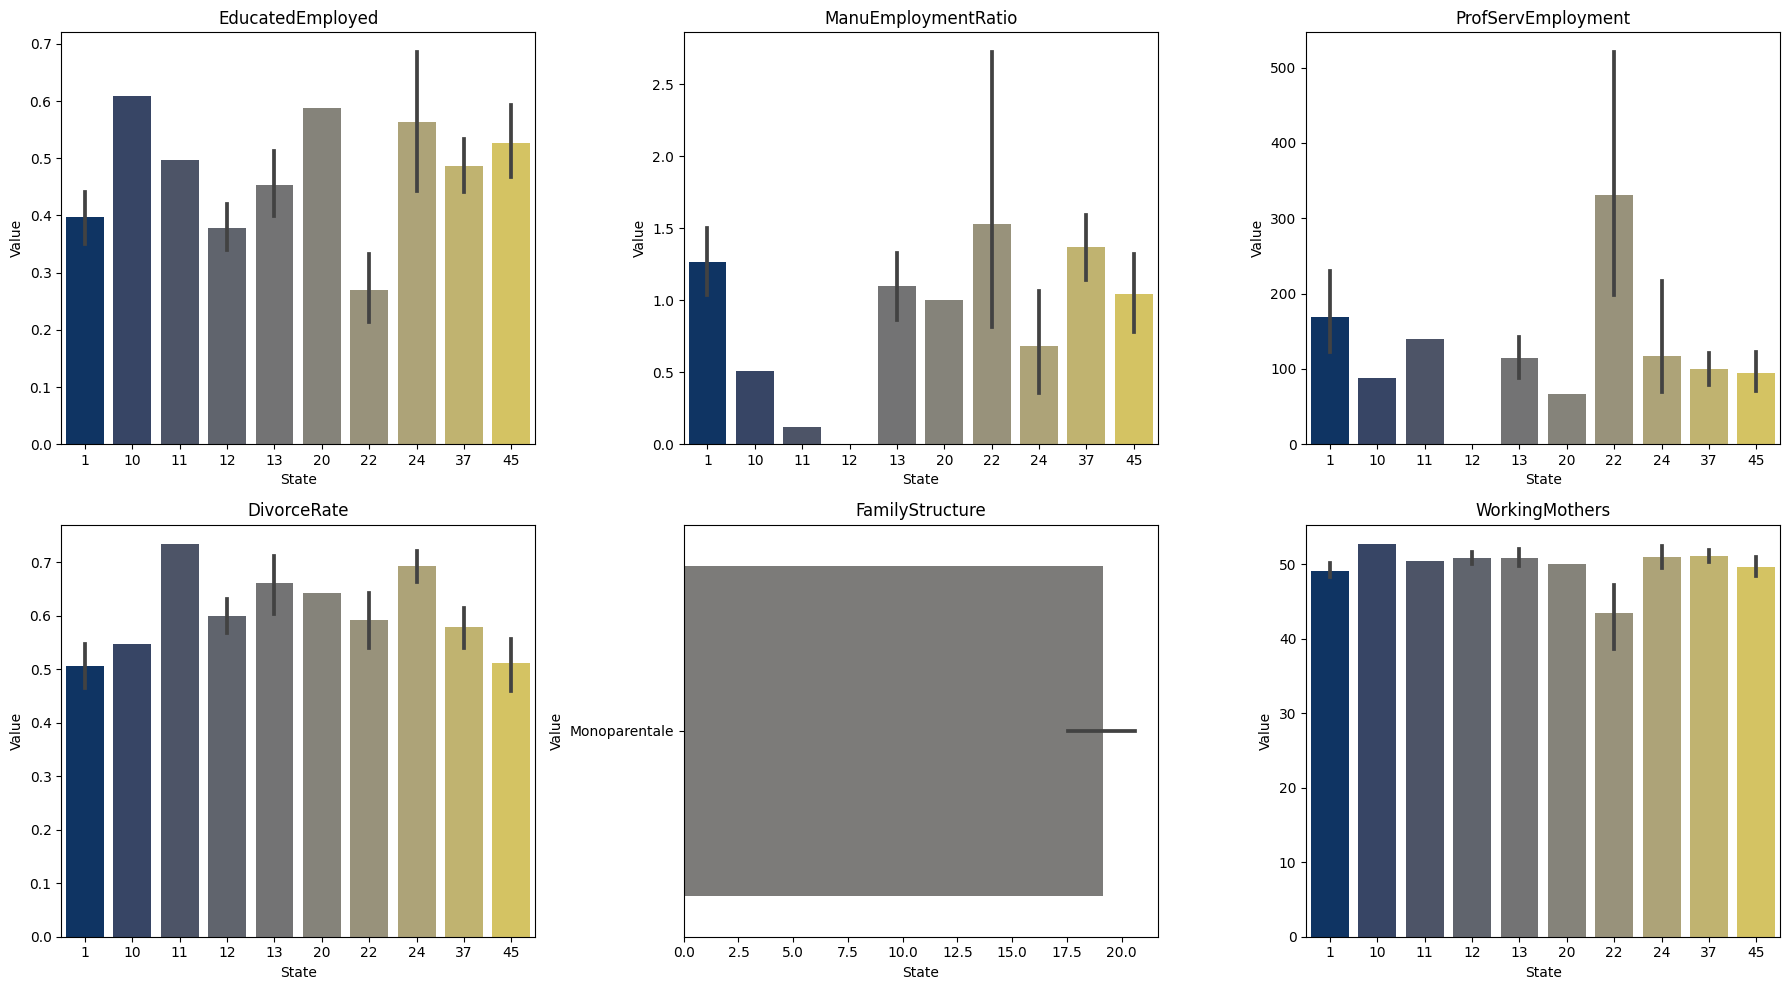

In [296]:
# Sélectionner les colonnes à afficher
columns_to_plot = ['EducatedEmployed', 'ManuEmploymentRatio', 'ProfServEmployment', 'DivorceRate', 'FamilyStructure', 'WorkingMothers']

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(columns_to_plot):
    
    # Sélectionner les données pour la colonne spécifique
    data = communities_and_crime.loc[communities_and_crime['state'].isin(top_10_states), ['state', col]]
    data = data.sort_values(by='state')
    
    # Créer le graphique à barres
    ax = axs[i // 3, i % 3]
    sns.barplot(x='state', y=col, data=data, palette='cividis', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('State')
    ax.set_ylabel('Value')


# Afficher les graphiques
plt.tight_layout()
plt.show()

> ## 🔥🔥🔥🔥🔥 *A COMPLETER AVEC LES CONCLUSIONS DES GRAPHES* 🔥🔥🔥🔥🔥🔥

# II - Application des algorithmes d'apprentissage supervisé sur les données : Prédiction du nombre de crimes violents


Pour notre tâche de prédiction de la colonne **ViolentCrimesPerPop** en utilisant des algorithmes d'apprentissage supervisé, nous allons considérer plusieurs algorithmes adaptés à une tâche de régression, étant donné que nous prédisons une valeur numérique. 

Voici les algorithmes d'apprentissage supervisés sur lesquels on va entrainer nos modèles :

1. *Régression linéaire :*
    * C'est le choix de base pour les problèmes de régression, notamment lorsque les relations entre les caractéristiques et la variable cible sont linéaires.
    * Simple à comprendre et à interpréter, ce qui en fait un bon point de départ.
    
    
2. *Arbres de décision :*
    * Flexibles et peuvent capturer des relations non linéaires entre les caractéristiques et la variable cible.
    * Peuvent gérer différents types de données et sont relativement robustes au bruit et aux valeurs aberrantes.


3. *Forêts aléatoires :*
    * Ensembles d'arbres de décision qui réduisent le surajustement et améliorent la généralisation en agrégeant les prédictions de plusieurs arbres.
    * Robustes et offrent généralement de bonnes performances sans nécessiter beaucoup de réglages d'hyperparamètres.


4. *Réseaux de neurones artificiels :*
    * Peuvent capturer des relations complexes et non linéaires entre les caractéristiques et la variable cible.
    * Ils sont particulièrement utiles lorsque les données sont très complexes ou lorsque les autres algorithmes ne parviennent pas à capturer les modèles de manière adéquate.

## Selon Critères démographiques

> On va appliquer l'algorithme de **regression linéaire** en prenant en compte deux features : 
> *     **FemalePctDiv:** pourcentage de femmes divorcées
> *     **MalePctDivorce:** pourcentage d'hommes divorcés

## Protocole experimental : 
couper les données en deux parties : 80% pour l'apprentissage et 20% pour la validation.

In [ ]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(communities_and_crime[['FemalePctDiv', 'MalePctDivorce']], communities_and_crime['ViolentCrimesPerPop'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

### 1. Algorithme de Regression linéaire :

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialiser le modèle
linear_reg = LinearRegression()

# Entraîner le modèle
linear_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_linear = linear_reg.predict(X_test)

# Évaluer les performances du modèle
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Afficher le taux d'erreur de cet algorithme
print("Mean Squared Error (Linear Regression):", mse_linear)

### 2. Algorithme d'Arbres de Décision

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialiser le modèle
decision_tree_reg = DecisionTreeRegressor()

# Entraîner le modèle
decision_tree_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_tree = decision_tree_reg.predict(X_test)

# Évaluer les performances du modèle
mse_tree = mean_squared_error(y_test, y_pred_tree)

# Afficher le taux d'erreur de cet algorithme
print("Mean Squared Error (Decision Tree):", mse_tree)

### 3. Algorithme de Fôrets aléatoires

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialiser le modèle
random_forest_reg = RandomForestRegressor()

# Entraîner le modèle
random_forest_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_forest = random_forest_reg.predict(X_test)

# Évaluer les performances du modèle
mse_forest = mean_squared_error(y_test, y_pred_forest)

# Afficher le taux d'erreur de cet algorithme
print("Mean Squared Error (Random Forest):", mse_forest)

In [ ]:
from sklearn.preprocessing import StandardScaler

### 4. Algorithme de Réseaux de neurones artificiels

> import tensorflow as tf
> from tensorflow import keras
> 
> # Normaliser les caractéristiques
> scaler = StandardScaler()
> X_train_scaled = scaler.fit_transform(X_train)
> X_test_scaled = scaler.transform(X_test)
> 
> # Créer le modèle de réseau de neurones
> model = keras.Sequential([
>     keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
>     keras.layers.Dense(64, activation='relu'),
>     keras.layers.Dense(1)  # Couche de sortie pour la prédiction
> ])
> 
> # Compiler le modèle
> model.compile(optimizer='adam', loss='mean_squared_error')
> 
> # Entraîner le modèle
> model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)  # Utilisation de la validation croisée
> 
> # Évaluer le modèle sur l'ensemble de test
> mse = model.evaluate(X_test_scaled, y_test)
> print("Mean Squared Error (Neural Network):", mse)
> 

### 5. Algorithme K-NN

> from sklearn.neighbors import KNeighborsClassifier
> import time
> 
> knn_classifier = KNeighborsClassifier(n_neighbors=1)
> 
> start_time = time.time()
> 
> knn_classifier.fit(X_train, y_train)
> 
> end_time = time.time()
> 
> training_time = end_time - start_time
> print("Temps d'apprentissage avec K-NN (k=1) :", training_time, "secondes")
> 
> #________________________
> 
> start_time = time.time()
> 
> # Effectuer les prédictions sur les données de validation
> y_pred = knn_classifier.predict(x_test)
> 
> end_time = time.time()
> prediction_time = end_time - start_time
> 
> # Calculer l'erreur de prédiction en utilisant accuracy_score
> prediction_accuracy = accuracy_score(y_test, y_pred)
> 
> print("Temps de prédiction avec K-NN (k=1) :", prediction_time, "secondes")
> print("Erreur de prédiction avec K-NN (k=1) :", prediction_accuracy)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser le modèle KNN
knn = KNeighborsRegressor(n_neighbors=5)  # Vous pouvez ajuster le nombre de voisins selon vos besoins

# Entraîner le modèle
knn.fit(X_train_scaled, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = knn.predict(X_test_scaled)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (KNN):", mse)

In [ ]:
x_train, x_test=train_test_split(communities_and_crime, test_size=0.2,random_state=42)
print( (x_train))

In [ ]:
from sklearn.model_selection import train_test_split
               # Variable cible ('label')

#separation de la data
Xtrain_data, Xtest_data,Ytrain_data, Ytest_data=train_test_split(communities_and_crime['county'],communities_and_crime['communityname'], test_size=0.21, random_state=42)

#print train
print(Xtrain_data)

In [ ]:
from sklearn.model_selection import train_test_split
               # Variable cible ('label')

#separation de la data
Xtrain_data, Xtest_data,Ytrain_data, Ytest_data=train_test_split(communities_and_crime['ViolentCrimesPerPop'],communities_and_crime['population'], test_size=0.21, random_state=42)

#print train
print(Xtrain_data)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(Ytrain_data, bins=17, color='blue', label='y_train')
plt.hist(Ytest_data, bins=17, color= 'orange', label= 'y_test')
plt.xlabel('Classe')
plt.ylabel('Fréquence')
plt.title('Histogramme des classes dans y_train et y_test')
plt.show

In [ ]:
import matplotlib.pyplot as plt

plt.hist(Xtrain_data, bins=17, color='blue', label='y_train')
plt.hist(Xtest_data, bins=17, color= 'orange', label= 'y_test')
plt.xlabel('Classe')
plt.ylabel('Fréquence')
plt.title('Histogramme des classes dans x_train et x_test')
plt.show

moyenne et variance de la population

In [ ]:
pop=communities_and_crime['population']

moy0=np.mean(pop,axis=0)
print(moy0)

var0=np.var(pop,axis=0)
print(var0)

moyenne et variance des crimes

In [ ]:
violent=communities_and_crime['ViolentCrimesPerPop']

moy1=np.mean(violent,axis=0)
print(moy1)

var1=np.var(violent,axis=0)
print(var1)